# <font color = 'orange'>Hierarchical Clustering Algorithm</font>

**Hierarchical Clustering** is the clustering algorithm used in Machine Learning.\
The **advantage** of using this type of clustering is that along with computing the algorithm there is a **dendrogram**(tree-type diagram of how clusters were formed), which gives us **a lot more info** about the data.\
However, we **cannot** apply it to **big datasets**: in these cases the **K-Means algorithm** is used.

## Types

There are **two types** of this algorithm: 
- 1) **Agglomerative**, or Bottom-Up\
In this type of algorithm we combine all the **small** clusters until there is **one big** cluster 
- 2) **Divisive**, or Top-Down
In this type of algorithm we divide clusters from **one big** cluster to **small** clusters.\
\
**Agglomerative type** is usually used, because the maths is simpler, thus, making it **easier** to apply.

___
## Agglomerative Hierarchichal Clustering

In agglomerative type we start from every data point being a small cluster. Then we combine the points using one of the likage methods.\
\
There are different types of linkage: 
- **Single linkage** (Nearest Neighbor)
- **Complete linkage** (Farthest Neighbor)
- **Average linkage** (Average of distance from each point in one cluster to every point in another cluster)
- **Wards Method**
- Between-Group Average linkage (UPGMA)
- Equilibrious Between-Group Average linkage (WPGMA)
- Centroid method
- Minival Varience method
- Minimal Sum-Of-Squares method\
and so on...

All the methods are used, so pick up the one which gives you more information about the data.

## Dendrogram

**Dendrogram** shows how the clusters were formed, and **height of node lines** shows the dissimilarity of two connected clusters.

___
## Single Method Application

In Single Method of hierarchical clustering we connect clusters by the least distance between nearest points of two clusters(Nearest Neighbors).


In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

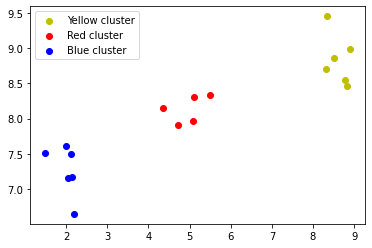

In [68]:
np.random.seed(149)

start_point1 = [np.random.randint(8, 11), np.random.randint(5, 10)]
start_point2 = [np.random.randint(4, 7), np.random.randint(5, 10)]
start_point3 = [np.random.randint(1, 3), np.random.randint(5, 10)]

#Creating data points
cluster1 = [[start_point1[0] + np.random.randn()/2, start_point1[1] + np.random.randn()/3] for i in range(np.random.randint(5,8))]
cluster1 = pd.DataFrame(data = cluster1, columns = ['x', 'y'])

cluster2 = [[start_point2[0] + np.random.randn()/2, start_point2[1] + np.random.randn()/3] for i in range(np.random.randint(5,8))]
cluster2 = pd.DataFrame(data = cluster2, columns = ['x', 'y'])

cluster3 = [[start_point3[0] + np.random.randn()/2, start_point3[1] + np.random.randn()/3] for i in range(np.random.randint(5,8))]
cluster3 = pd.DataFrame(data = cluster3, columns = ['x', 'y'])

#plotting our graph: cluster points

plt.scatter(cluster1['x'], cluster1['y'], color = 'y', label = 'Yellow cluster')
plt.scatter(cluster2['x'], cluster2['y'], color = 'r', label = 'Red cluster')
plt.scatter(cluster3['x'], cluster3['y'], color = 'b', label = 'Blue cluster')

plt.legend()

In [69]:
#Creating a dataset from points
data = pd.DataFrame(columns = ['x', 'y'])
data['x'] = pd.concat([cluster1['x'], cluster2['x'], cluster3['x']], ignore_index = True)
data['y'] = pd.concat([cluster1['y'], cluster2['y'], cluster3['y']], ignore_index = True)
data

,x,y
0,8.322179,8.708514
1,8.893037,8.985107
2,8.338194,9.450564
3,8.784793,8.543341
4,8.836645,8.463659
5,8.503515,8.858682
6,5.106744,8.303370
7,4.345506,8.146347
8,5.083386,7.970331
9,5.498708,8.332163


In [70]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
model.fit(data)
data['cluster'] = model.labels_
data

,x,y,cluster
0,8.322179,8.708514,0
1,8.893037,8.985107,0
2,8.338194,9.450564,0
3,8.784793,8.543341,0
4,8.836645,8.463659,0
5,8.503515,8.858682,0
6,5.106744,8.303370,2
7,4.345506,8.146347,2
8,5.083386,7.970331,2
9,5.498708,8.332163,2


In [71]:
#Make clusters from data
cluster1_p = data[data['cluster'] == 0].drop('cluster', axis = 1)
cluster2_p = data[data['cluster'] == 1].drop('cluster', axis = 1)
cluster3_p = data[data['cluster'] == 2].drop('cluster', axis = 1)

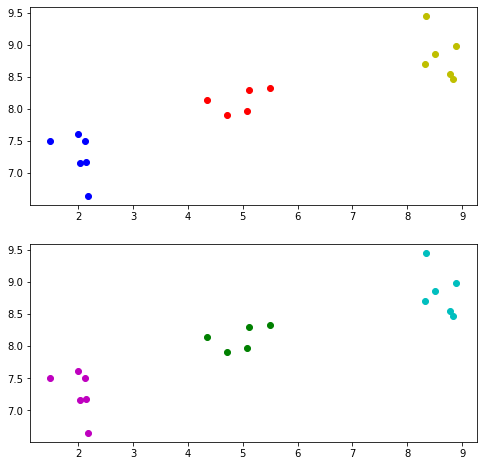

In [72]:
#Creating two subplots: first for actual data, second for predicted
fig, [ActualAx, PredictAx] = plt.subplots(2)
fig.set_size_inches(8, 8)


#Predicted clusters 
PredictAx.scatter(cluster1_p['x'], cluster1_p['y'], color = 'c')
PredictAx.scatter(cluster2_p['x'], cluster2_p['y'], color = 'm')
PredictAx.scatter(cluster3_p['x'], cluster3_p['y'], color = 'g')

#Actual clusters
ActualAx.scatter(cluster1['x'], cluster1['y'], color = 'y')
ActualAx.scatter(cluster2['x'], cluster2['y'], color = 'r')
ActualAx.scatter(cluster3['x'], cluster3['y'], color = 'b')

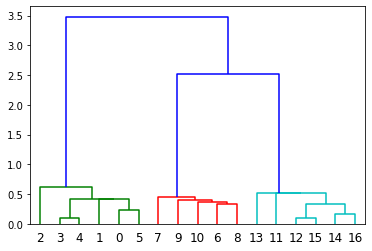

In [73]:
#Plotting the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
link = linkage(data, method = 'single')
plt.figure()
dg= dendrogram(link)